###ML PROBLEM STATEMENT 1

11-07-2024

---

Problem Statement 1: Predicting Housing Prices Using Linear
Regression

In [ ]:
# @title importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset

house_dataset = pd.read_csv("/content/housing.csv")
house_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


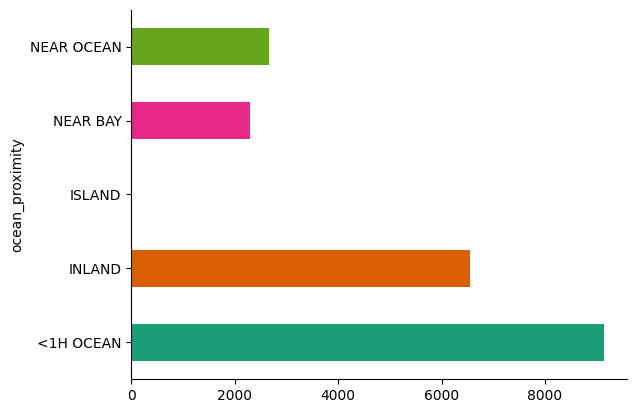

In [ ]:
# @title ocean_proximity

from matplotlib import pyplot as plt
import seaborn as sns
house_dataset.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Data Preprocessing

#Datset shape, colno and row no and info

house_dataset.shape
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#null valus present in dataset

house_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#handling null values
# Finding the mean of the column having NaN
mean_value = house_dataset['total_bedrooms'].mean()
# print(mean_value)

#filling missing values with means value of theta columns
house_dataset['total_bedrooms'].fillna(value=mean_value, inplace=True)


In [ ]:
#Handling Ocean Proximity

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
house_dataset['ocean_proximity'] = label_encoder.fit_transform(house_dataset['ocean_proximity'])
house_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


<Axes: xlabel='median_house_value', ylabel='Count'>

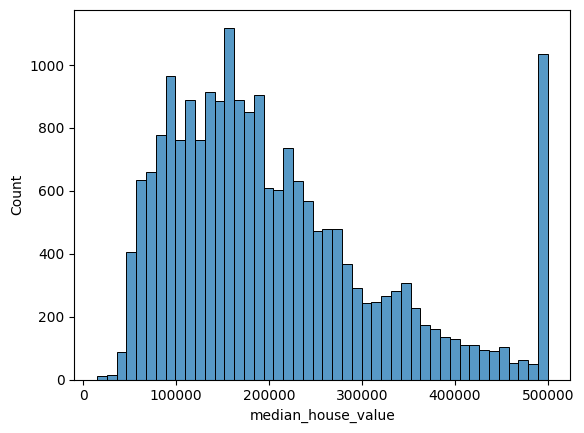

In [ ]:
# @title EDA

sns.histplot(house_dataset['median_house_value'])

<Axes: >

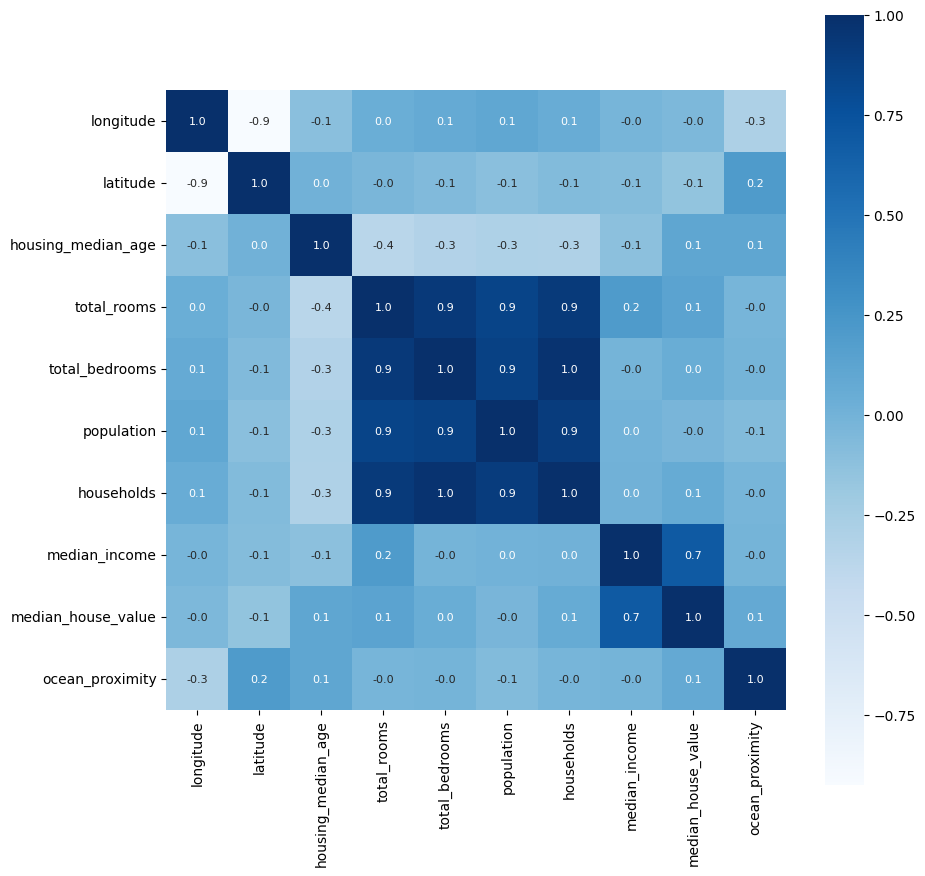

In [ ]:
#correlation
correlation = house_dataset.corr()

# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

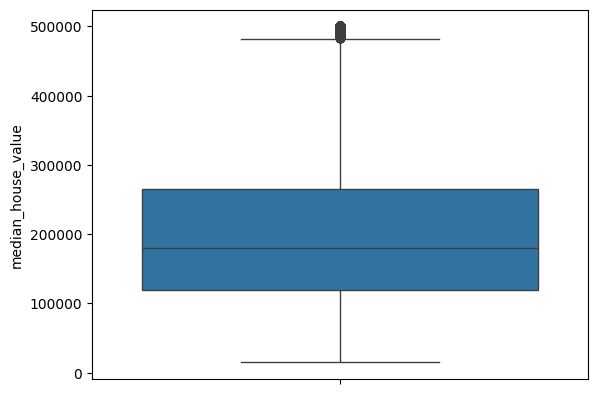

In [ ]:
#handling the outlier if any

sns.boxplot(house_dataset['median_house_value'])
plt.show()

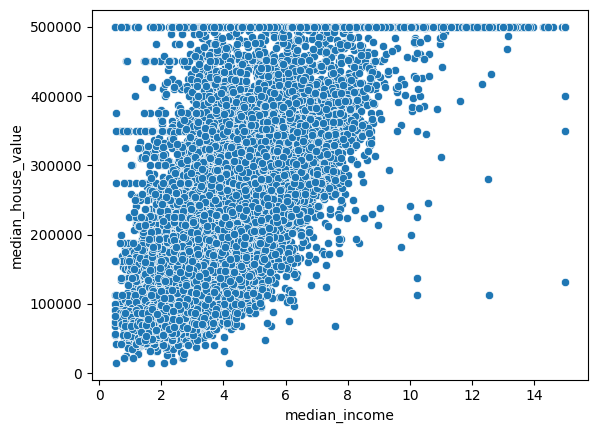

In [ ]:
scatterplot = sns.scatterplot(x='median_income', y='median_house_value', data=house_dataset)

In [ ]:
# @title Model Deployment

#target variable initalization
target = house_dataset['median_house_value']
target.head()

#feature initialization
features = house_dataset.drop(['median_house_value'], axis=1)
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [ ]:
print(target)
print(features)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43         

In [ ]:
#splitting into train and test data

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)

print(features.shape, X_train.shape, X_test.shape)
print(target.shape, Y_train.shape, Y_test.shape)

(20640, 9) (16512, 9) (4128, 9)
(20640,) (16512,) (4128,)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# prediction on Test Data
test_data_prediction = model.predict(X_test)
# prediction on Train data
training_data_prediction = model.predict(X_train)

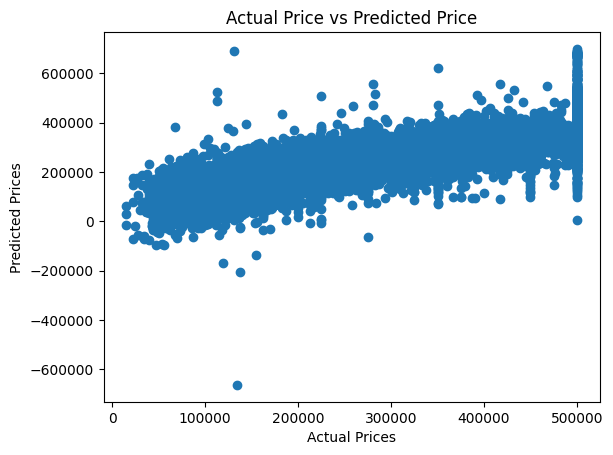

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(Y_test,test_data_prediction))

from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(Y_test,test_data_prediction))

from sklearn.metrics import r2_score
r2 = r2_score(Y_test,test_data_prediction)
print("R2 : ",r2)

MAE:  51553.23609857847
MSE:  4975477925.354508
R2 :  0.6306319351664211


In [ ]:
# @title Cross Validation

# @title Support Vector Machine

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
scores = cross_val_score(svm_classifier, features, target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
